# Tumor Growth Modeling with ODEs

In this notebook, we simulate tumor growth using two classical mathematical models from mathematical biology:

- **Logistic Growth**
- **Gompertz Growth**

These models describe how tumor size evolves over time, accounting for biological limits such as resource constraints or immune system response. We will derive, solve, and visualize these models using Python's scientific stack.

---

## Background

The **Logistic** and **Gompertz** equations are nonlinear differential equations that model population growth over time, taking on the form:

$
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$

The **Gompertz Growth** equation is derived as:

$
\frac{dP}{dt} = rP\left(\ln(\frac{K}{P}\right))
$

Where:
- $P(t)$: Population size (or tumor size) at time $t$
- $r$: Growth rate
- $K$: Carrying capacity (maximum sustainable population size)

This same framework is widely used in **tumor growth modeling**, where \( P(t) \) represents the tumor mass or volume. We will compare it to another important model — the **Gompertz equation**, which often more accurately captures real tumor behavior at large sizes.

---


       time   logistic   gompertz
0  0.000000  10.000000  10.000000
1  0.200401  10.404687  11.983164
2  0.400802  10.825574  14.257702
3  0.601202  11.263292  16.849024
4  0.801603  11.718498  19.781519


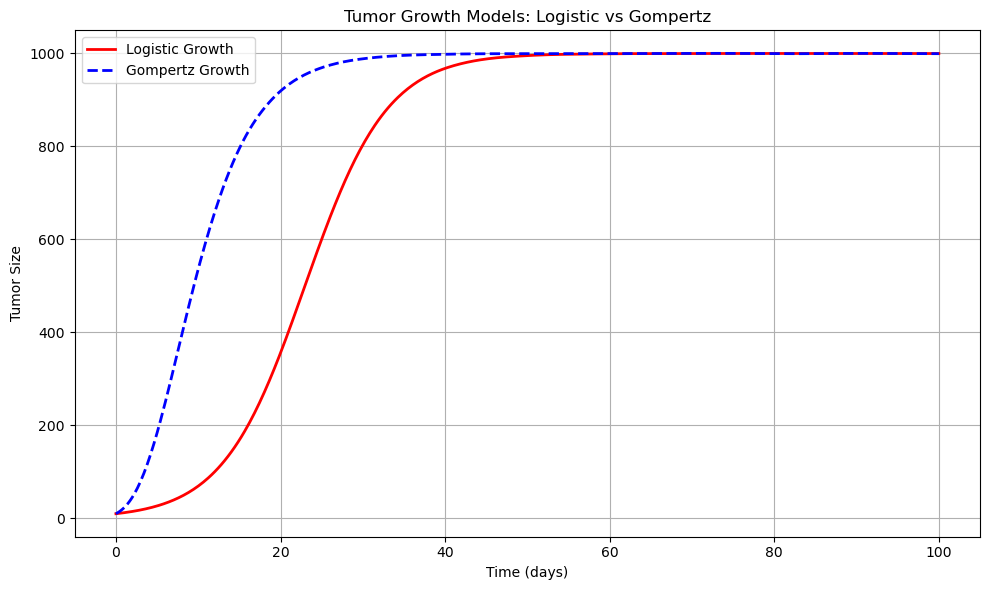

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt

def logistic_model(t, P, r, K):
    return r*P * (1 - P/K)

def gompertz_model(t, P, r, K):
    return r*P*np.log(K/P)

# Solve IVPs numerically
r = 0.2 # Growth rate
K = 1000 # Carrying capacity
P0 = 10 # Initial tumor size

t_span = (0,100)
t_eval = np.linspace(t_span[0], t_span[1], 500)
sol_logistic = solve_ivp(logistic_model, t_span, [P0], args=(r,K), t_eval=t_eval)
sol_gompertz = solve_ivp(gompertz_model, t_span, [P0], args=(r,K), t_eval=t_eval)

# Print out first set of data points
df = pd.DataFrame({
    'time': t_eval,
    'logistic': sol_logistic.y[0],
    'gompertz': sol_gompertz.y[0],
})

print(df.head())

# Saving data
df.to_csv('simulated_growth_model.csv', columns=['time', 'logistic', 'gompertz'], index=False)


plt.figure(figsize=(10,6))
plt.plot(sol_logistic.t, sol_logistic.y[0], label='Logistic Growth', linewidth=2, color='r')
plt.plot(sol_gompertz.t, sol_gompertz.y[0], label='Gompertz Growth', linewidth=2, linestyle='--', color='b')
plt.title("Tumor Growth Models: Logistic vs Gompertz")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Discrete Dynamical Systems (Euler Approximation)

In this section, we simulate tumor growth using discrete-time approximations of our ODEs, which are easy to implement using loops and give insight into iterative population dynamics. These are derived by applying the **Euler method** to approximate the ODEs. This approach evolves the system step-by-step and helps build intuition for numerical integration methods covered in mathematical modeling courses.



   time  logistic_discrete  gompertz_discrete
0   0.0          10.000000          10.000000
1   0.1          10.450000          11.151293
2   0.2          10.917899          12.374375
3   0.3          11.404193          13.667214
4   0.4          11.909375          15.027218


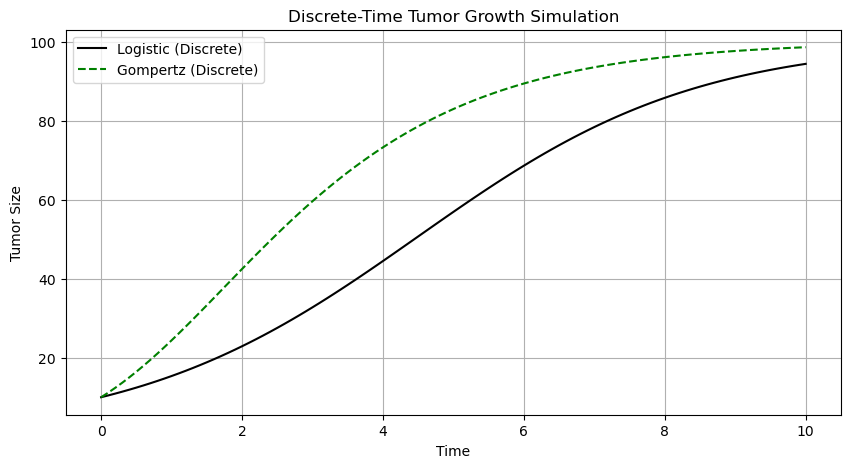

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
r = 0.5           # growth rate
K = 100           # carrying capacity
P0 = 10           # initial tumor size
T = 10            # total time
dt = 0.1          # timestep
steps = int(T / dt)

# Arrays to hold values
time = np.linspace(0, T, steps + 1)
logistic_vals = np.zeros(steps + 1)
gompertz_vals = np.zeros(steps + 1)

# Initial values
logistic_vals[0] = P0
gompertz_vals[0] = P0

# Discrete simulation
for n in range(steps):
    P_log = logistic_vals[n]
    P_gomp = gompertz_vals[n]
    
    logistic_vals[n + 1] = P_log + r * P_log * (1 - P_log / K) * dt
    gompertz_vals[n + 1] = P_gomp + r * P_gomp * np.log(K / P_gomp) * dt

# Create DataFrame
df_discrete = pd.DataFrame({
    'time': time,
    'logistic_discrete': logistic_vals,
    'gompertz_discrete': gompertz_vals
})
print(df_discrete.head())
df_discrete.to_csv('simulated_growth_discrete.csv', columns=['time', 'logistic_discrete', 'gompertz_discrete'], index=False)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_discrete['time'], df_discrete['logistic_discrete'], label='Logistic (Discrete)', color='k')
plt.plot(df_discrete['time'], df_discrete['gompertz_discrete'], label='Gompertz (Discrete)', linestyle='--', color='g')
plt.xlabel('Time')
plt.ylabel('Tumor Size')
plt.title('Discrete-Time Tumor Growth Simulation')
plt.legend()
plt.grid(True)
plt.show()


# Summary

---

We have now solved the logistic and Gompertz equations using discrete and continuous units. The logistic and Gompertz ODEs can be derived in discrete units as:

**Logistic**:

$
\frac{dP}{dt} = \frac{P_{n+1} - P_n}{\Delta{t}} \Rightarrow P_{n+1} = rP_n\Delta{t}(1-\frac{P_n}{K})
$

**Gompertz**:

$
\frac{dP}{dt} = \frac{P_{n+1} - P_n}{\Delta{t}} \Rightarrow P_{n+1} = rP_n\Delta{t}\ln(\frac{K}{P})
$

Given these two recurrence relations, we can use numerical methods via **Euler approximation** to approximate the continuous solution to be:

**Logistic**:

$
P_{L}(t) = \frac{K}{1+(\frac{K-P_0}{P_0})e^{rt}}
$

**Gompertz**:

$
P_{G}(t) = K(\frac{P_0}{K})e^{-rt}
$

The Gompertz and Logistic models also produce sigmoidal growth but with an asymmetric curve that grows faster initially and slows down earlier than the logistic model. It’s especially useful for modeling growth with early deceleration, such as tumor growth. As time progresses, the continuous solutions tend to grow faster than their discrete Euler approximations unless very small $\Delta{t}$. Discretization introduces numerical error, which can be reduced using smaller time steps or higher-order methods like Runge-Kutta. Both models converge to the carrying capacity $K$, but the logistic model assumes symmetric growth dynamics, whereas the Gompertz model captures asymmetric growth typical in real biological systems (e.g., tumors, bacterial colonies). 

Additionally, we visualized:
- Time series plots comparing logistic and Gompertz growth behaviors
- A tabulated dataset of synthetic tumor growth for further use

This notebook serves as both a theoretical and computational foundation for understanding tumor dynamics through the lens of dynamical systems. By formulating both discrete and continuous versions of the logistic and Gompertz models, we obtain flexible tools for simulating and analyzing bounded growth in biological systems. Euler’s method provides a simple way to approximate these dynamics, while the closed-form solutions help validate and compare the long-term behavior of the models under ideal conditions.